In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# EDA

## articles.csv

In [52]:
articles = pd.read_csv("./Data/articles.csv")
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


### Fix column types

The columns ending in '_id', '_code', and '_no' should be strings instead of ints.

In [62]:
import re

# regex pattern: find all column names with '_id', '_code', or '_no'
pattern = '.*(_id|_code|_no).*'

# dict comprehension: Sets all columns with '_id', '_code', or '_no' to str type
dtype_dict = {column: str for column in articles.columns if re.match(pattern, column)}

articles = articles.astype(dtype = dtype_dict)

### Check for null values

*detail_desc* is the only column with NAs (416 NA values)

In [106]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  object
 1   product_code                  105542 non-null  object
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  object
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  object
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  object
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  object
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  object
 13 

### Summary statistics

In [65]:
articles.nunique() # Number of unique values in each column

article_id                      105542
product_code                     47224
prod_name                        45875
product_type_no                    132
product_type_name                  131
product_group_name                  19
graphical_appearance_no             30
graphical_appearance_name           30
colour_group_code                   50
colour_group_name                   50
perceived_colour_value_id            8
perceived_colour_value_name          8
perceived_colour_master_id          20
perceived_colour_master_name        20
department_no                      299
department_name                    250
index_code                          10
index_name                          10
index_group_no                       5
index_group_name                     5
section_no                          57
section_name                        56
garment_group_no                    21
garment_group_name                  21
detail_desc                      43404
dtype: int64

For the most part, the number of unique values for *variable_name* $\approx$ or $<$ *variable_id/_no/_code*. There are some descrepencies in the product, department, and section variables. Why? 

Ensuing questions: 

1. Drop either the *variable_name* columns or the corresponding *variable_id/no/code* columns since they provide similar info?  
- we need to retain article_id as that's what we're predicting
- Otherwise keep the variable_name columns as they are more interpretable?

2. Alternatives to one-hot-encoding? There are a lot of categories for each categorical variables, so one-hot-encoding may not be suitable.

3. multioutput classification problem?. For each customer predict 12 article_ids that they may purchase in the next 7 days. Thus we're predicting 12 articles/classes for each customer and there are are a total of 105542 articles/ classes to choose from.

4. Consider using NLP to gain more insight from the *variable_name* variables (i.e. product_type_name, detail_desc) 

### Exploratory Visualizations

In [96]:
import re

# regex pattern: find all columns names with _name
pattern = '.*_name.*'

# dict comprehension: Sets all columns with '_id', '_code', or '_no' to str type
name_vars = [column for column in articles.columns if re.match(pattern, column)]

print(name_vars)

['prod_name', 'product_type_name', 'product_group_name', 'graphical_appearance_name', 'colour_group_name', 'perceived_colour_value_name', 'perceived_colour_master_name', 'department_name', 'index_name', 'index_group_name', 'section_name', 'garment_group_name']


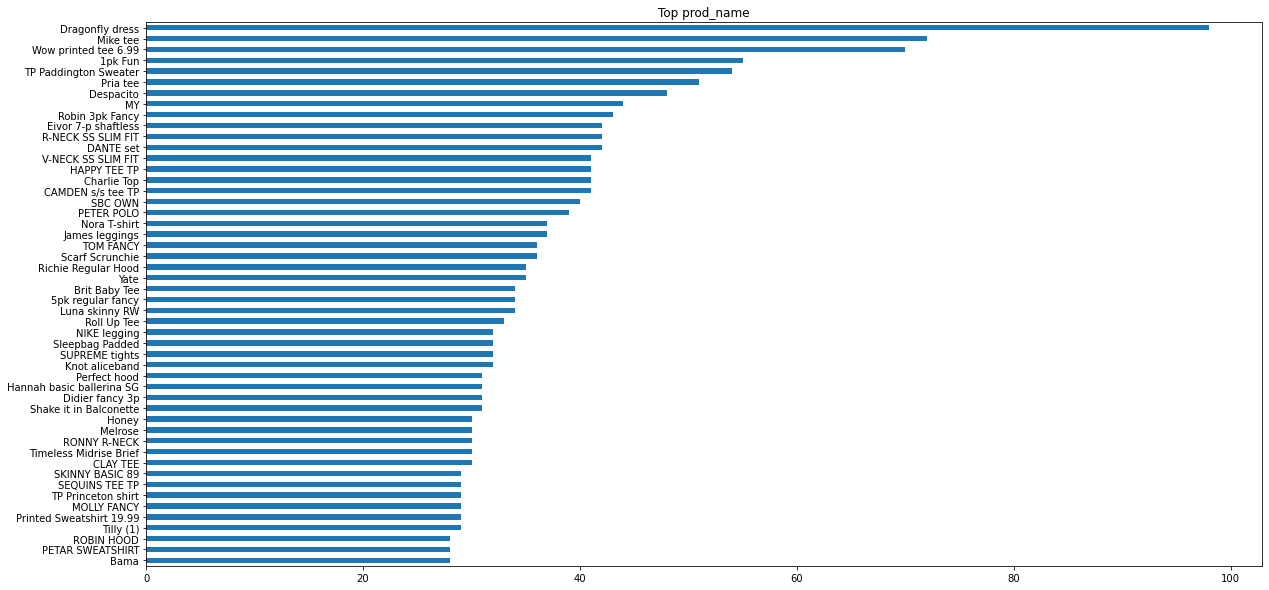

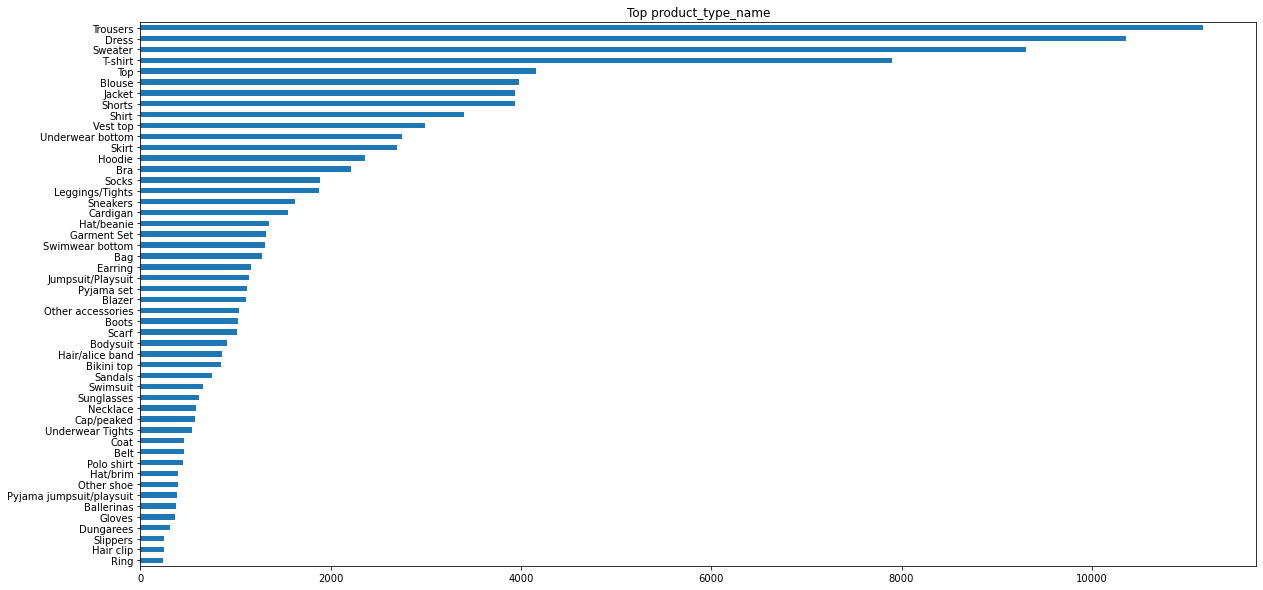

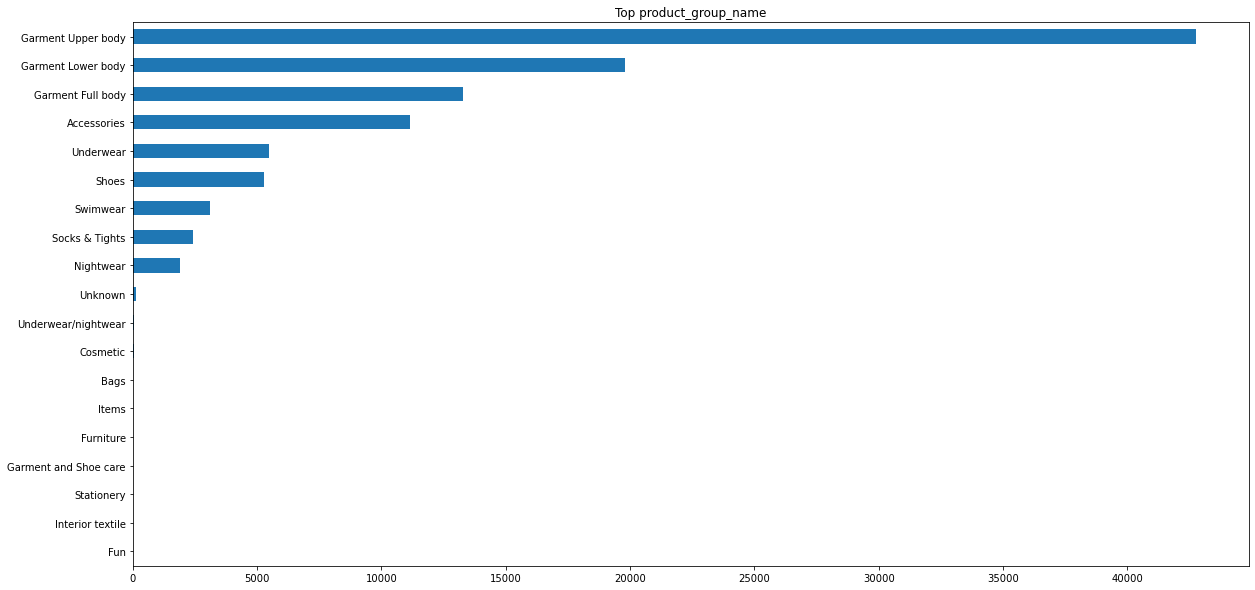

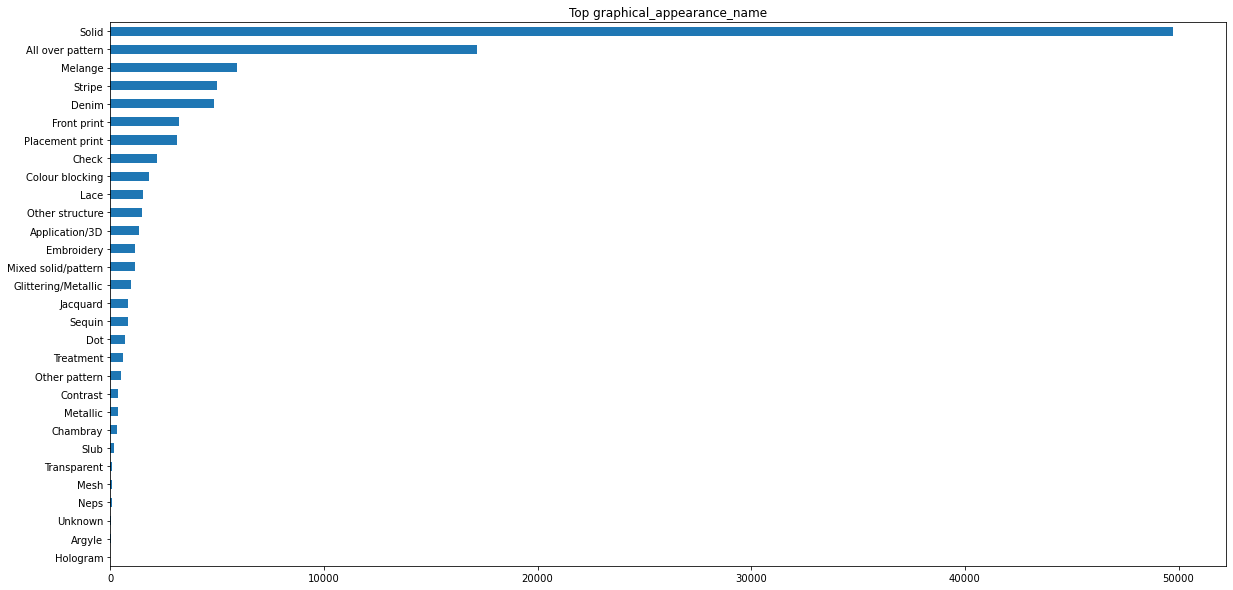

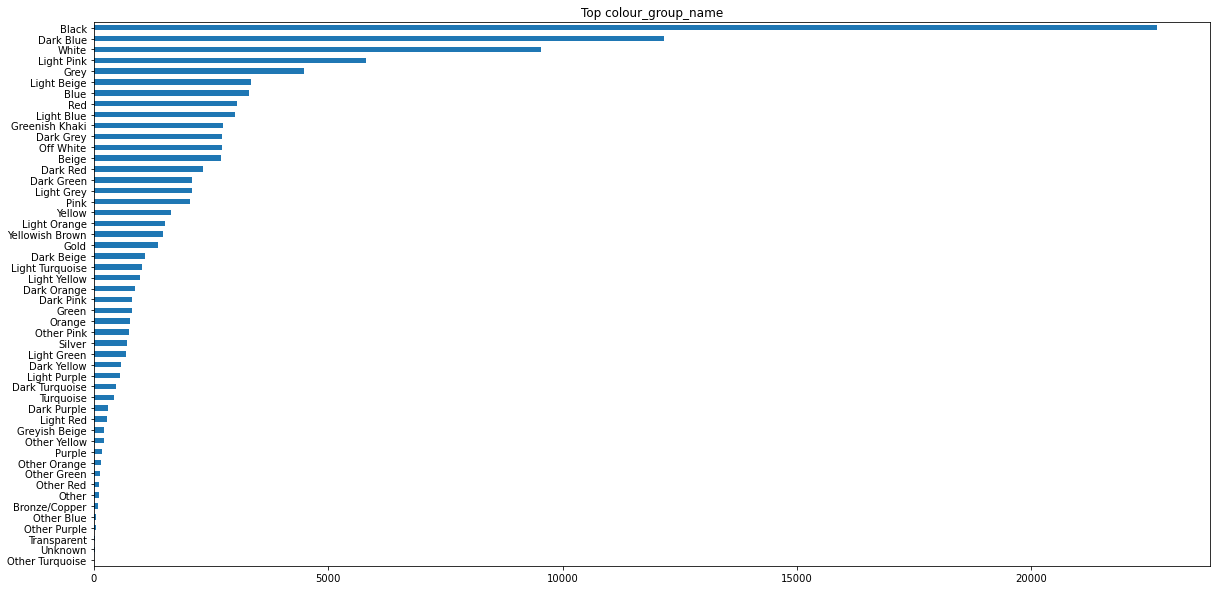

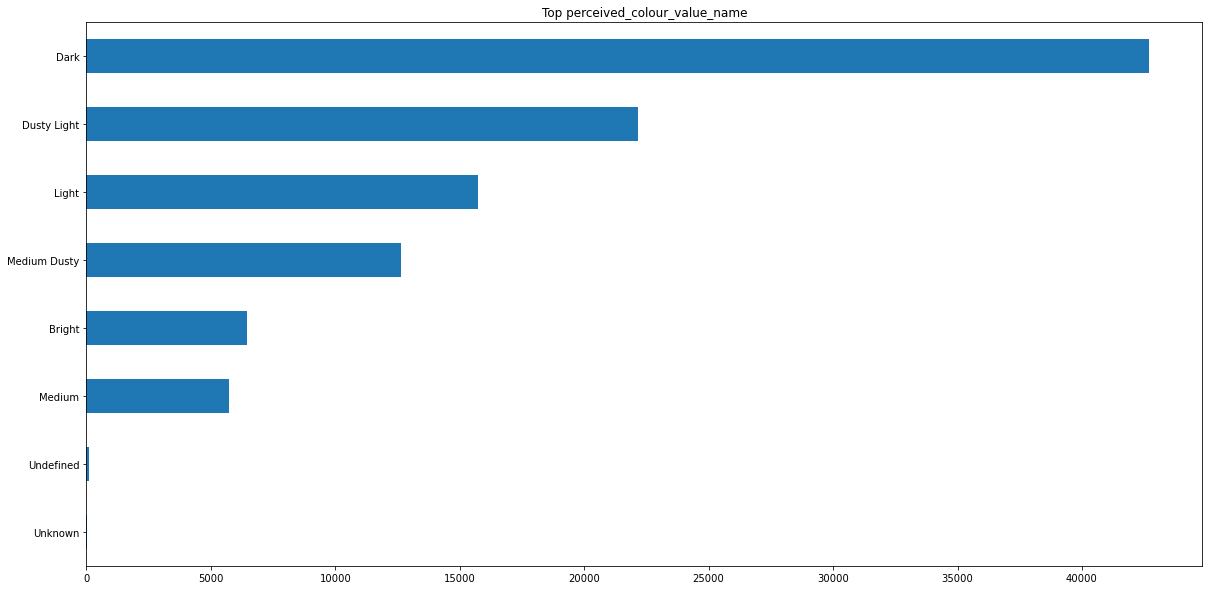

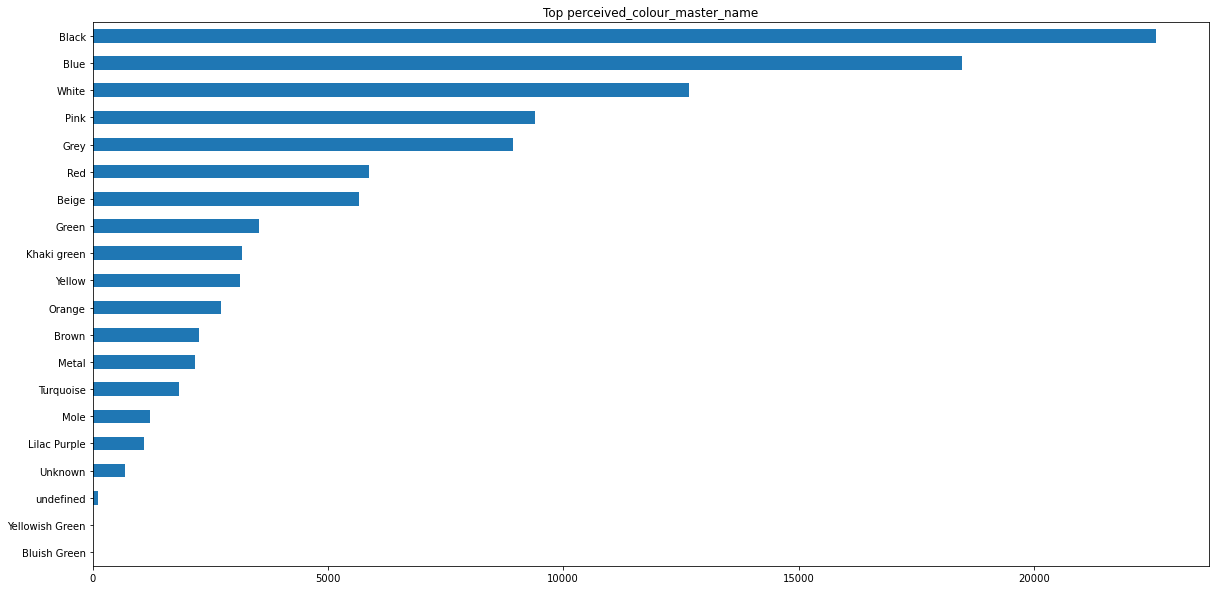

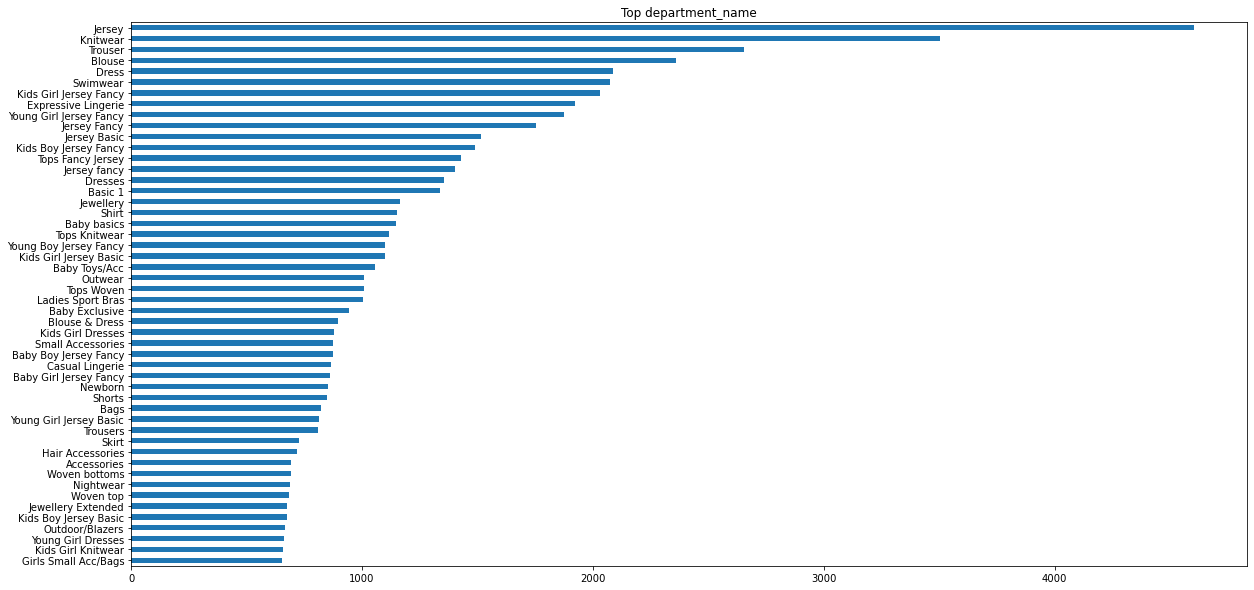

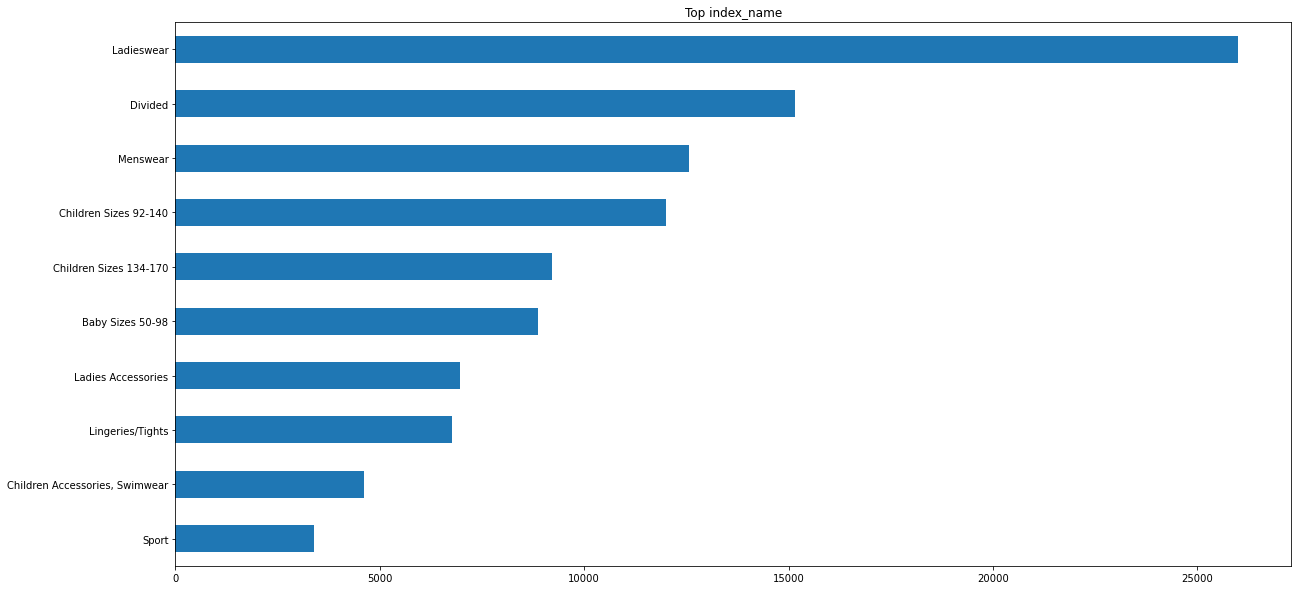

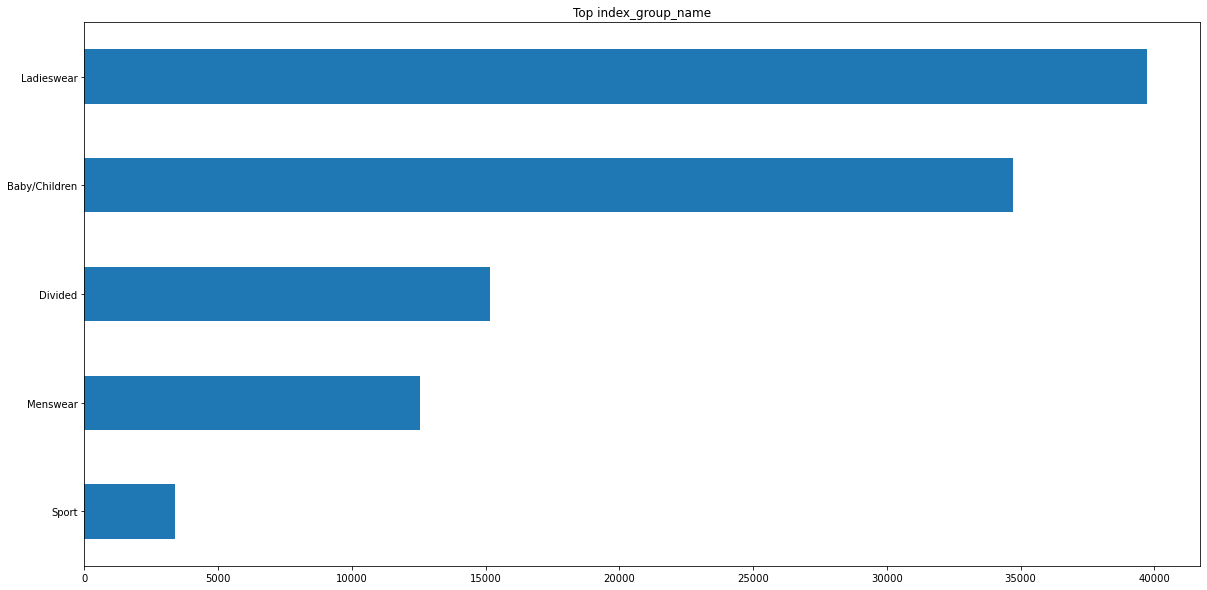

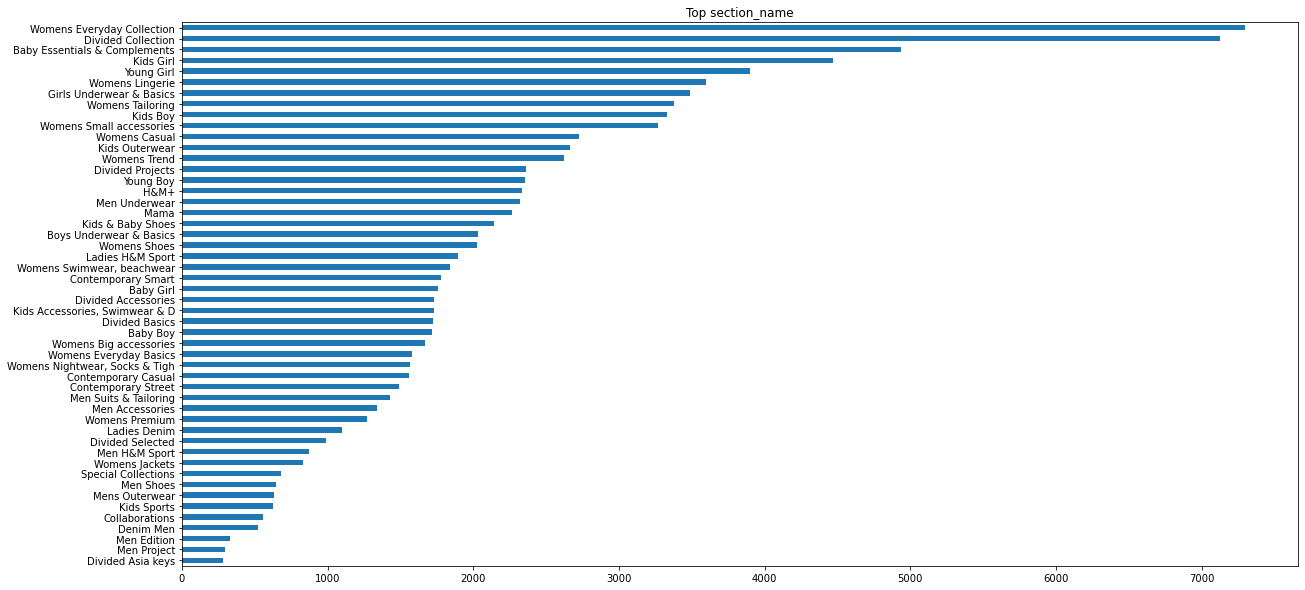

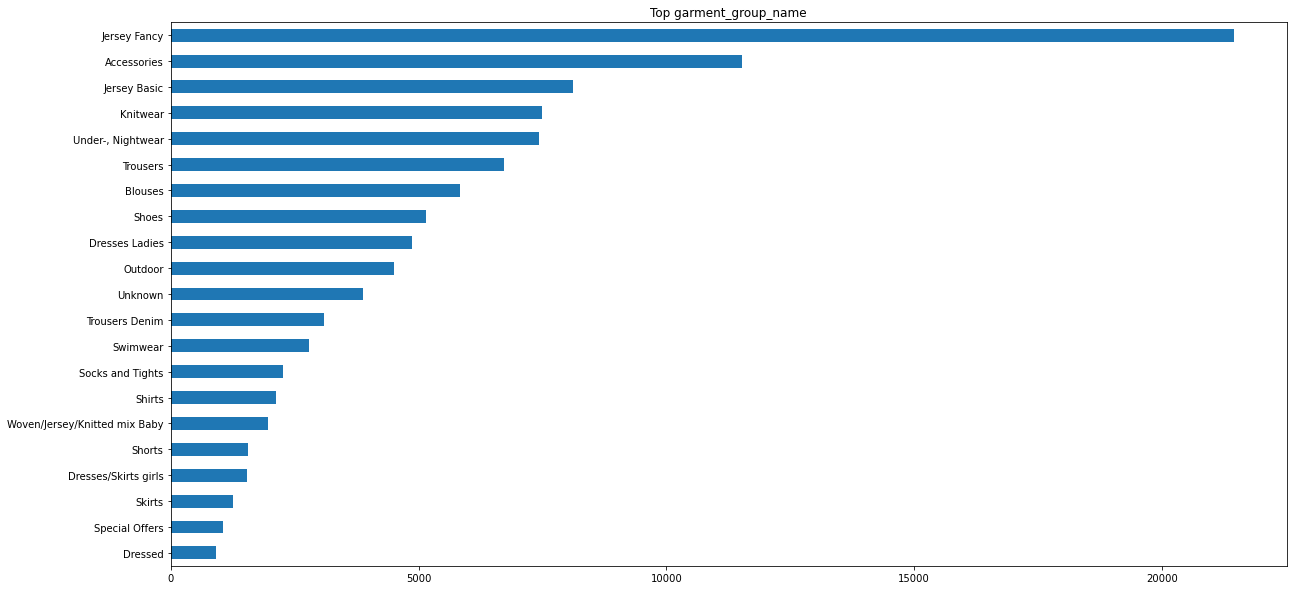

In [104]:
for column in name_vars: 
    plt.figure()
    articles[column] \
        .value_counts()[:50] \
        .sort_values() \
        .plot(figsize = (20, 10), kind='barh', title = 'Top {}'.format(column))
    plt.show()

### customers.csv

Relevant columns: customer_id, fashion_news_frequency(?), age. Maybe postal code, but night be more effort than it's worth

In [17]:
customers = pd.read_csv("./Data/customers.csv")

In [18]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [24]:
customers.nunique()

customer_id               1371980
FN                              1
Active                          1
club_member_status              3
fashion_news_frequency          4
age                            84
postal_code                352899
dtype: int64

### transactions_train.csv

In [20]:
transactions = pd.read_csv("./Data/transactions_train.csv")